# Scopt example

In [1]:
from modelgym.models import CtBClassifier, XGBClassifier, LGBMClassifier
from modelgym.utils import ModelSpace
from skopt.space import Integer, Categorical, Real
from sklearn.datasets import make_classification
from modelgym.utils import XYCDataset
from modelgym.trainers import SkoptTrainer
from modelgym.report import Report
from modelgym.metrics import Accuracy, RocAuc
import pandas as pd
import math

In [2]:
catboost_space = [
    Integer(low=100, high=101, name='iterations'),
    Integer(low=1, high=11, name='depth'),
    Real(low=math.exp(-5), high=1e-1, prior='log-uniform', name='learning_rate'),
    Real(low=0.01, high=1, prior='uniform', transform='identity', name='rsm'),
    Categorical(categories=('Newton', 'Gradient'), prior=None, name='leaf_estimation_method'),
    Integer(low=1, high=10, name='l2_leaf_reg'),
    Real(low=0, high=2, prior='uniform', transform='identity', name='bagging_temperature')
]
catboost_model = ModelSpace(CtBClassifier,
                   space=catboost_space,
                   space_update=False)

In [3]:
xgboost_space = [
    Real(low=0.01, high=1.0, prior='log-uniform', name='learning_rate'),
    Integer(low=0, high=5, name='min_child_weight'),
    Integer(low=0, high=50, name='max_depth'),
    Integer(low=0, high=20, name='max_delta_step'),
    Real(low=0.01, high=1.0, prior='subsample', name='uniform'),
    Real(low=0.01, high=1.0, prior='uniform', name='colsample_bytree'),
    Real(low=0.01, high=1.0, prior='uniform', name='colsample_bylevel'),
    Real(low=1e-9, high=1000, prior='log-uniform', name='reg_lambda'),
    Real(low=1e-9, high=1000, prior='log-uniform', name='reg_alpha'),
    Real(low=1e-9, high=0.5, prior='log-uniform', name='gamma'),
    Integer(low=50, high=100, name='n_estimators'),
    Real(low=1e-6, high=500, prior='log-uniform', name='scale_pos_weight'),
]
xgboost_model = ModelSpace(XGBClassifier,
                   space=xgboost_space,
                   space_update=False)

In [4]:
models = [
    catboost_model,
    xgboost_model,
]

## Get dataset

Toy dataset

In [5]:
X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_classes=2)
dataset = XYCDataset(X, y)

In [6]:
# X, y = make_classification(n_samples=100, n_features=4, n_informative=2, n_classes=2)
# dataset = pd.DataFrame(data=X)
# dataset['y'] = y
# dataset.head()

## Create a Skopt Trainer

In [7]:
trainer = SkoptTrainer(models)

## Optimize hyperparams

Of course, it will take some time.

In [8]:
%%time
trainer.crossval_optimize_params(Accuracy(), dataset, metrics=[Accuracy(), RocAuc()])

/home/dev/work/lambda/modelgym/env/lib/python3.6/site-packages/scikit_optimize-0.5-py3.6.egg/skopt/optimizer/optimizer.py:369: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/home/dev/work/lambda/modelgym/env/lib/python3.6/site-packages/scikit_optimize-0.5-py3.6.egg/skopt/optimizer/optimizer.py:369: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


CPU times: user 16min 20s, sys: 7min 32s, total: 23min 52s
Wall time: 4min 4s


{'CtBClassifier': {'loss': -0.8796791443850268,
  'metric_cv_results': [{'accuracy': 0.9117647058823529, 'roc_auc': 0.96875},
   {'accuracy': 0.9090909090909091, 'roc_auc': 0.9462962962962963},
   {'accuracy': 0.8181818181818182, 'roc_auc': 0.8809523809523809}],
  'params': {'iterations': 100,
   'depth': 4,
   'learning_rate': 0.07662725937826036,
   'rsm': 0.16388852513362684,
   'leaf_estimation_method': 'Gradient',
   'l2_leaf_reg': 9,
   'bagging_temperature': 0.65840409518586}},
 'XGBClassifier': {'loss': -0.8600713012477718,
  'metric_cv_results': [{'accuracy': 0.8529411764705882,
    'roc_auc': 0.9548611111111112},
   {'accuracy': 0.9090909090909091, 'roc_auc': 0.924074074074074},
   {'accuracy': 0.8181818181818182, 'roc_auc': 0.875}],
  'params': {'learning_rate': 0.7082046579816424,
   'min_child_weight': 3,
   'max_depth': 29,
   'max_delta_step': 1,
   'uniform': 0.7477984156352975,
   'colsample_bytree': 0.7598923100404467,
   'colsample_bylevel': 0.5658823270367197,
   'r

In [9]:
trainer.get_best_results()

{'CtBClassifier': {'result': {'loss': -0.8796791443850268,
   'metric_cv_results': [{'accuracy': 0.9117647058823529, 'roc_auc': 0.96875},
    {'accuracy': 0.9090909090909091, 'roc_auc': 0.9462962962962963},
    {'accuracy': 0.8181818181818182, 'roc_auc': 0.8809523809523809}],
   'params': {'iterations': 100,
    'depth': 4,
    'learning_rate': 0.07662725937826036,
    'rsm': 0.16388852513362684,
    'leaf_estimation_method': 'Gradient',
    'l2_leaf_reg': 9,
    'bagging_temperature': 0.65840409518586}},
  'model_space': <modelgym.utils.model_space.ModelSpace at 0x7fba17256d68>},
 'XGBClassifier': {'result': {'loss': -0.8600713012477718,
   'metric_cv_results': [{'accuracy': 0.8529411764705882,
     'roc_auc': 0.9548611111111112},
    {'accuracy': 0.9090909090909091, 'roc_auc': 0.924074074074074},
    {'accuracy': 0.8181818181818182, 'roc_auc': 0.875}],
   'params': {'learning_rate': 0.7082046579816424,
    'min_child_weight': 3,
    'max_depth': 29,
    'max_delta_step': 1,
    'unif

## Report best results

In [10]:
reporter = Report(trainer.get_best_results(), dataset, [Accuracy(), RocAuc()])

### Report in text form

In [11]:
reporter.print_all_metric_results()


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                           tuned
CtBClassifier  0.879679 (+2.28%)
XGBClassifier  0.860071 (+0.00%)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

                           tuned
CtBClassifier  0.932000 (+1.53%)
XGBClassifier  0.917978 (+0.00%)


### Report plots


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    accuracy    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



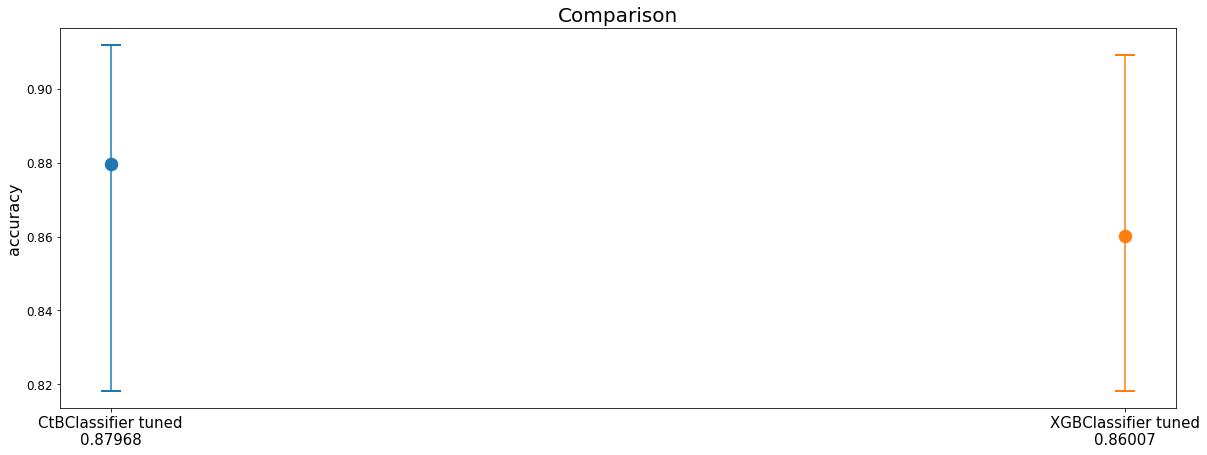


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~    roc_auc    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



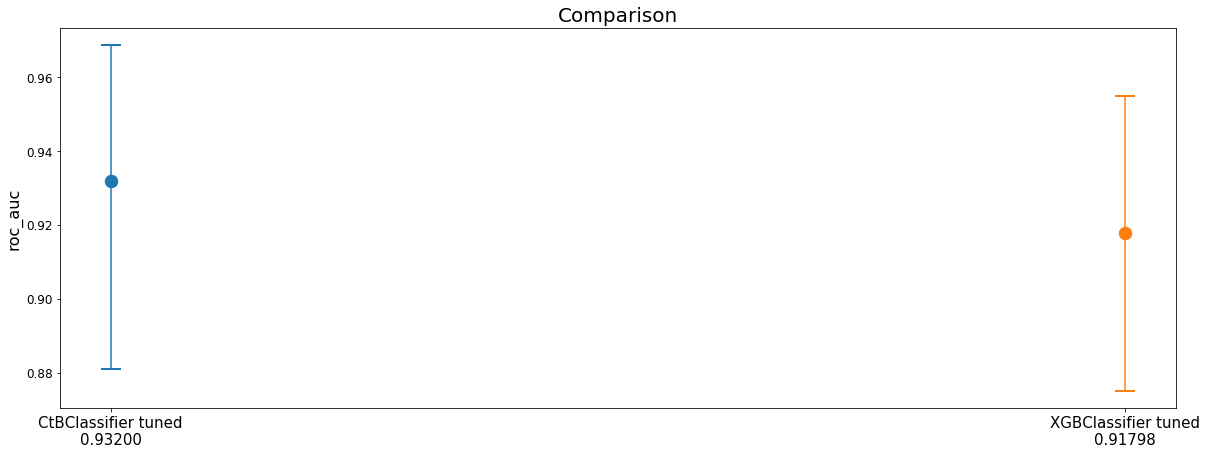

In [12]:
reporter.plot_all_metrics()

### Report heatmaps for each metric

In [13]:
# reporter.plot_heatmaps()

That's it! 

If you like it, please follow the advanced tutorial and learn all features modelgym can provide.